# Exploracion de datos

Vamos a realizar un análisis detallado de tres conjuntos de datos que han sido previamente depurados: las reseñas de usuarios (data_reviews), la información de juegos (data_output) y las interacciones entre ellos (data_items). A través de la aplicación de estadísticas descriptivas y visualizaciones, nuestro objetivo es profundizar en las distribuciones, preferencias y tendencias a lo largo del tiempo, identificando las variables más significativas.

### Importamos las librerias necesarias

In [50]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Extraccion de los datos a partir de los archivos csv

In [51]:
df_reviews = pd.read_csv("data2/user_reviews_limpio7.csv")

In [52]:
df_items = pd.read_csv("data2/user_items_limpio5.csv")

In [53]:
df_output = pd.read_csv("data2/output_steam_games_limpio9.csv")

# EDA Dataset Output

Revisamos la estructura, tipo de datos y valores nulos del dataset

In [54]:
df_output.shape

(28834, 6)

In [55]:
df_output.columns

Index(['app_name', 'id', 'developer', 'price_number', 'release_year',
       'main_genre'],
      dtype='object')

In [56]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28834 entries, 0 to 28833
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      28834 non-null  object 
 1   id            28834 non-null  int64  
 2   developer     28834 non-null  object 
 3   price_number  28834 non-null  float64
 4   release_year  28834 non-null  int64  
 5   main_genre    28834 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [57]:
df_subset_output = df_output[["release_year","price_number"]]
df_subset_output.describe()

,release_year,price_number
count,28834.000,28834.000
mean,2014.855,8.626
std,3.242,15.809
min,1983.000,0.000
25%,2014.000,1.990
50%,2016.000,4.990
75%,2017.000,9.990
max,2021.000,995.000


Conclusiones preliminares de la estructura de df_output:
* Se observa que no tenemos valores nulos para ninguna de las variables
* El dataframe contine 28834 registros y 6 columnas donde se detallan caracteristicas de los juegos
* Se puede observar que el dato predominante es el object pero tambien hay tipo int y float

### Variable "main_genres"

Esta columna nos brinda informacion acerca del genero principal que presenta cada juego

In [58]:
print("Valores únicos de main_genre:", df_output["main_genre"].unique())

Valores únicos de main_genre: ['Action' 'Free to Play' 'Casual' 'Adventure' 'Racing' 'Strategy' 'Indie'
 'RPG' 'Simulation' 'Sports' 'Massively Multiplayer' 'Sin Dato'
 'Animation &amp; Modeling' 'Utilities' 'Education'
 'Design &amp; Illustration' 'Audio Production' 'Video Production'
 'Software Training' 'Accounting' 'Web Publishing' 'Photo Editing'
 'Early Access']


In [59]:
ranking_generos = df_output["main_genre"].value_counts()
top_10_gen= ranking_generos.head(10)
top_10_gen

main_genre
Action                       11241
Casual                        4337
Adventure                     4315
Indie                         3298
Simulation                    1836
Strategy                      1126
RPG                            677
Free to Play                   516
Racing                         454
Design &amp; Illustration      327
Name: count, dtype: int64

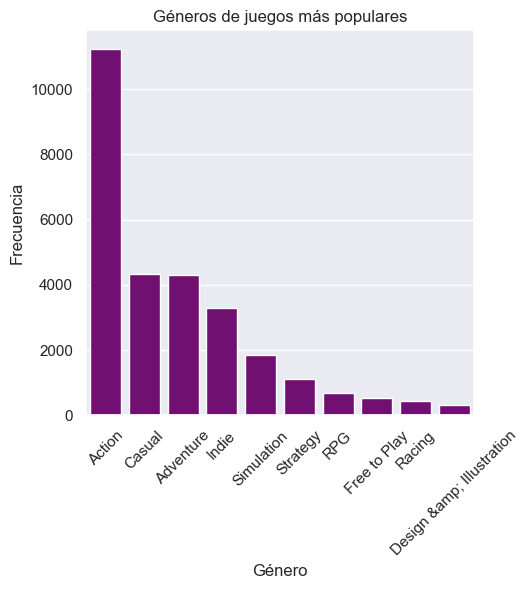

In [60]:
plt.figure(figsize=(5, 5))
sns.barplot(x=top_10_gen.index, y=top_10_gen.values, color="purple")
plt.title("Géneros de juegos más populares")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

In [61]:
ranking_generos = df_output["main_genre"].value_counts()
ranking_generos.head(5)

main_genre
Action        11241
Casual         4337
Adventure      4315
Indie          3298
Simulation     1836
Name: count, dtype: int64

Podemos visualizar que el top cinco de generos de juegos mas populares son: Action, Casual, Adventure, Indie y Simulation

### Variable "Developer"

Se procede analizar quienes son los desarrolladores que mas contribuyen a la creacion de juegos de Steam, a partir de la grafica de frecuencia

In [62]:
ranking_developers = df_output["developer"].value_counts()
ranking_developers.head(5)

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
Name: count, dtype: int64

En el caso de esta variable solo se grafican el top 10 de desarrolladores dado que son los mas relevantes para el analisis

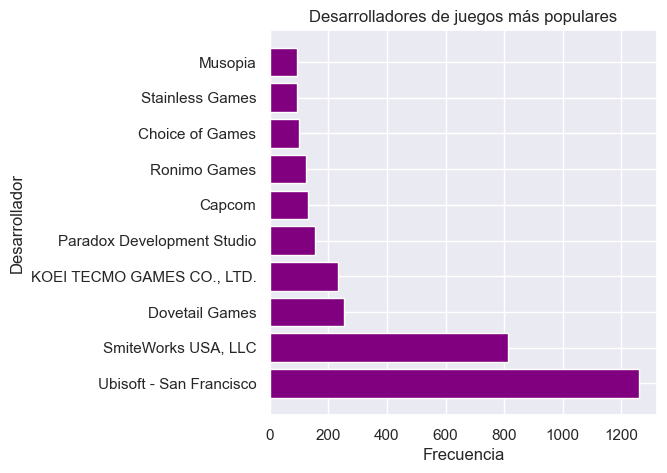

In [63]:
top_10_developer = df_output["developer"].value_counts().head(10)
plt.figure(figsize=(5, 5))
plt.barh(top_10_developer.index, top_10_developer.values, color="purple")
plt.title("Desarrolladores de juegos más populares")
plt.ylabel("Desarrollador")
plt.xlabel("Frecuencia")
plt.show()


Verificamos que hay una clara diferencia de entre frecuencias y que los desarrolladores mas importantes son: Ubisoft - San Francisco, SmiteWorks USA, LLC y Dovetail Games  

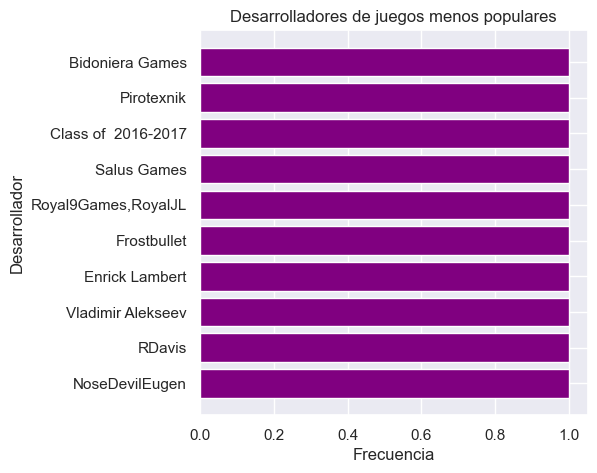

In [64]:
top_10_developer_tail = df_output["developer"].value_counts().tail(10)
plt.figure(figsize=(5, 5))
plt.barh(top_10_developer_tail.index, top_10_developer_tail.values, color="purple")
plt.title("Desarrolladores de juegos menos populares")
plt.ylabel("Desarrollador")
plt.xlabel("Frecuencia")
plt.show()


In [65]:
ranking_developers = df_output["developer"].value_counts()
ranking_developers.tail(5)

developer
Royal9Games,RoyalJL    1
Salus Games            1
Class of  2016-2017    1
Pirotexnik             1
Bidoniera Games        1
Name: count, dtype: int64

En este caso podemos observar que los desarrolladores que menos juegos desarrollaron para la plataforma son: Jan Bögemann ,bad monkee, Frolov Pavel,Best Friend Games y Bidoniera Games

### Variables "app_name" y "id" 

Las dos variables nos representan los juegos tanto sea para nombrar como para asignarles una serie numerica identificatoria

In [66]:
df_output["app_name"].unique()

array(['Lost Summoner Kitty', 'Ironbound', 'Real Pool 3D - Poolians', ...,
       'LOGistICAL: South Africa', 'Russian Roads', 'EXIT 2 - Directions'],
      dtype=object)

### Variable "release_year"
Esta variable nos indica el año en el que fue lanzado el juego, por lo que procederemos a analizar la frecuencia de los años

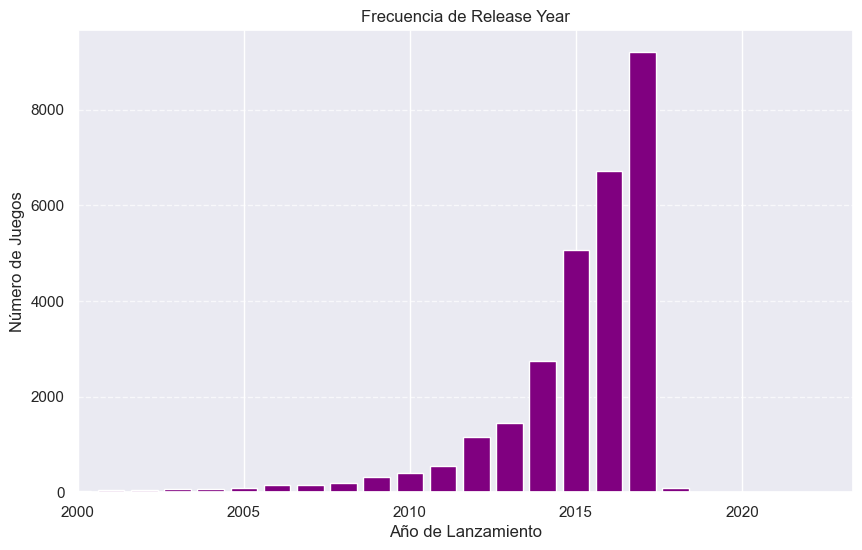

In [67]:
release_year_counts = df_output["release_year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(release_year_counts.index, release_year_counts.values, color="purple")
plt.title("Frecuencia de Release Year")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xlim(left=2000)
plt.show()


In [68]:
release_year_counts = df_output["release_year"].value_counts()
release_year_counts.head(5)

release_year
2017    9200
2016    6707
2015    5075
2014    2736
2013    1440
Name: count, dtype: int64

A partir del analisis realizado observamos que el 2017 fue el año donde mas juegos fueron lanzados

### Analisis de correlaciones

<Figure size 1400x800 with 0 Axes>

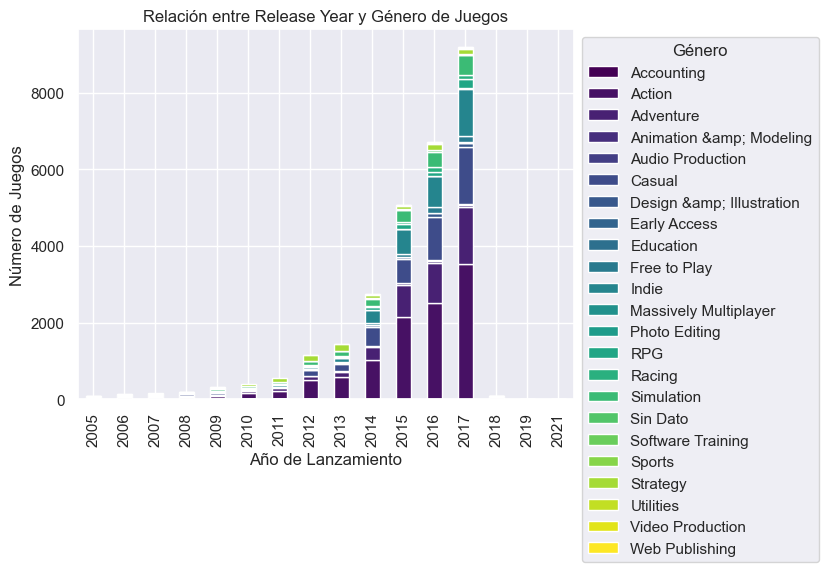

In [69]:
pivot_table = df_output.pivot_table(index="release_year", columns="main_genre", aggfunc="size", fill_value=0)
pivot_table = pivot_table[pivot_table.index >= 2005]
plt.figure(figsize=(14, 8))
pivot_table.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Relación entre Release Year y Género de Juegos")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.legend(title="Género", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

<Figure size 1400x800 with 0 Axes>

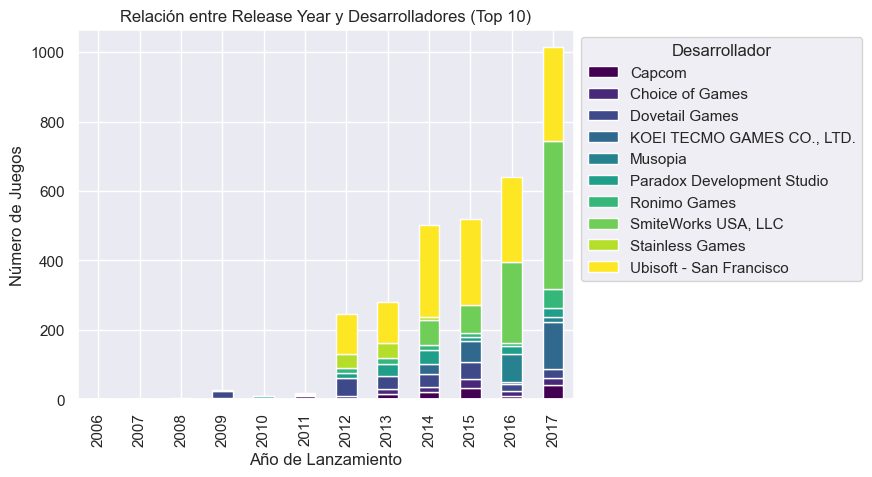

In [70]:
top_10_developers_ = df_output["developer"].value_counts().head(10).index
df_top_developers = df_output[df_output["developer"].isin(top_10_developers_)]
pivot_table_developers = df_top_developers.pivot_table(index='release_year', columns='developer', aggfunc='size', fill_value=0)
pivot_table_developers = pivot_table_developers[pivot_table_developers.index >= 2005]
plt.figure(figsize=(14, 8))
pivot_table_developers.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Relación entre Release Year y Desarrolladores (Top 10)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.legend(title="Desarrollador", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


# EDA Items

Revisamos la estructura, tipo de datos y valores nulos del dataset

In [71]:
df_items.shape

(3002801, 5)

In [72]:
df_items.columns

Index(['user_id', 'items_count', 'item_id', 'item_name', 'playtime_forever'], dtype='object')

In [73]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002801 entries, 0 to 3002800
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           int64  
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB


In [74]:
df_items.isnull().sum()

user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

In [75]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_items.describe()

,items_count,item_id,playtime_forever
count,3002801.000,3002801.000,3002801.000
mean,323.651,202377.222,773.745
std,723.548,122934.396,4043.478
min,1.000,20.000,0.000
25%,70.000,91310.000,0.000
50%,135.000,224260.000,43.000
75%,275.000,285900.000,342.000
max,7762.000,530720.000,635295.000


Conclusiones preliminares de la estructura de df_items:

* Se observa que no tenemos valores nulos para ninguna de las variables
* El dataframe contine 3002801 registros y 5 columnas donde se detallan los juegos de cada usuario junto con el tiempo que lo consumieron
* Se puede observar que el dato predominante es el int pero tambien hay tipo object y float

### Variable "user_id"

Esta variable es un identificador unico para cada usuario

In [76]:
if df_items["user_id"].nunique() == len(df_items):
    print("Todos los user_ids son únicos.")
else:
    print("Hay duplicados en los user_ids.")

Hay duplicados en los user_ids.


En este caso podemos verificar que tenemos valores duplicados ya que cada usuario puede hacer consumido mas de un juego y el dataframe registra cada juego consumido por usuario y no solo por usuario

### Variable "items_count"
Esta variable nos indica la cantidad de juegos consumidos por cada usuario

In [77]:
df_items["items_count"].describe()

count   3002801.000
mean        323.651
std         723.548
min           1.000
25%          70.000
50%         135.000
75%         275.000
max        7762.000
Name: items_count, dtype: float64

Podemos observar que el 75% de los usuarios consumieron entre 1 a 275 juegos mientras que el maximo de juegos consumidos por usuario alcanzo un valor de 7762 y el minimo un valor de 1. El promedio de juegos consumido por usuario es de 324 juegos

### Variable "item_name"

Esta variable nos indica el nombre del juego que cada usuario consumio

In [78]:
top_10_juegos = df_items["item_name"].value_counts().head(10)
top_10_juegos

item_name
Dota 2 Test           49571
Unturned              38682
Left 4 Dead 2         37044
Left 4 Dead 2 Beta    37044
Terraria              29239
Warframe              25807
Portal 2              24465
PAYDAY 2              23729
Robocraft             21785
Borderlands 2         21029
Name: count, dtype: int64

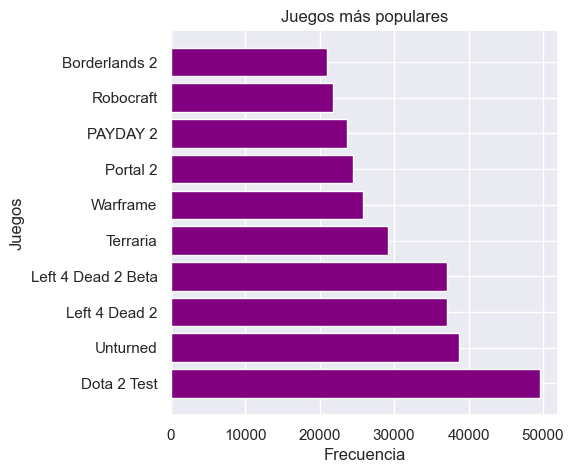

In [79]:
plt.figure(figsize=(5, 5))
plt.barh(top_10_juegos.index, top_10_juegos.values, color="purple")
plt.title("Juegos más populares")
plt.ylabel("Juegos")
plt.xlabel("Frecuencia")
plt.show()

En esta caso los juegos mas consumidos por los usuarios son: 
* Dota 2 Test
* Unturned          
* Left 4 Dead 2
* Left 4 Dead 2 Beta
* Terraria   

### Variable "playtime_forever"

Esta variable nos indica el tiempo de juego que consumio el usuario por juego

In [80]:
df_items["playtime_hours"] = df_items["playtime_forever"]/60
df_items["playtime_hours"].describe()

count   3002801.000
mean         12.896
std          67.391
min           0.000
25%           0.000
50%           0.717
75%           5.700
max       10588.250
Name: playtime_hours, dtype: float64

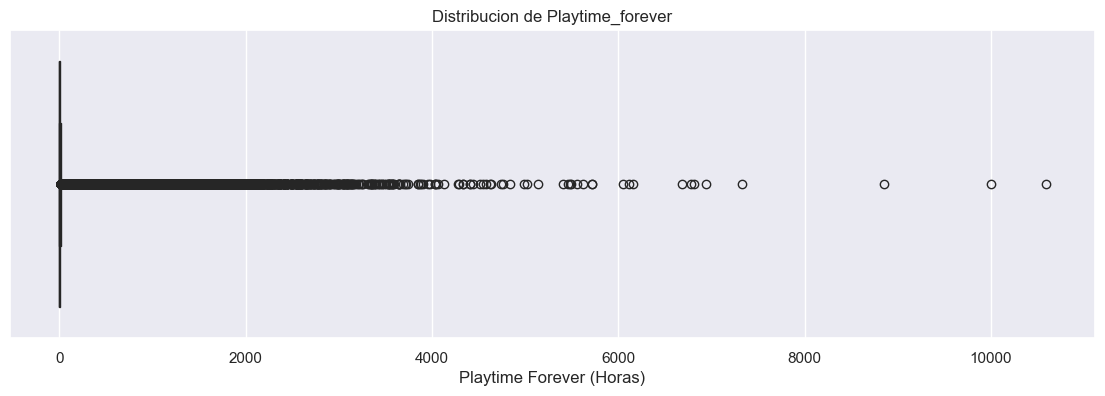

In [81]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=df_items["playtime_hours"], color="purple")
plt.title("Distribucion de Playtime_forever")
plt.xlabel("Playtime Forever (Horas)")
plt.show()

In [82]:
Q1 = df_items["playtime_hours"].quantile(0.25)
Q3 = df_items["playtime_hours"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_items[(df_items["playtime_hours"] < lower_limit) | (df_items["playtime_hours"] > upper_limit)]
num_outliers = len(outliers)
print(f'Número de valores atípicos: {num_outliers}')
outliers_up = df_items[(df_items["playtime_hours"] > upper_limit)]
num_outliers_up = len(outliers_up)
print(f'Número de valores atípicos: {num_outliers_up}')
print(upper_limit)

Número de valores atípicos: 433286
Número de valores atípicos: 433286
14.25


A partir de las estadisticas descriptivas detalladas arribas podemos concluir que el 75% de los usuarios consumen alrededor de 0 a 5.700 hs un juego mientras que el valor maximo es de 10588.250 hs , aunque el valor promedio de consumo de un juego es de 12.896hs. Tambien podemos observar que tenemos 433286 valores atipicos que se encuentran por encima del limite de 14.25hs

### Variable "item_id"

Esta es una variable identificatoria de cada juego

In [83]:
df_items["item_id"].value_counts().head(10)

item_id
205790    49571
304930    38682
550       37044
223530    37044
105600    29239
230410    25807
620       24465
218620    23729
301520    21785
49520     21029
Name: count, dtype: int64

Estos son los item_id que mas consumieron los usuarios

Aqui abajo se pueden observar los items que fueron mas tiempo consumidos (en horas)

In [84]:
total_playtime_by_item = df_items.groupby("item_id")["playtime_hours"].sum().sort_values(ascending=False)
top_items = total_playtime_by_item.head(5)
top_items

item_id
105600   2582909.017
230410   2067128.383
550      1703157.050
218620   1662731.900
252490   1352006.933
Name: playtime_hours, dtype: float64

### Analisis de correlaciones

### "user_id" que mas tiempo de juego consumieron

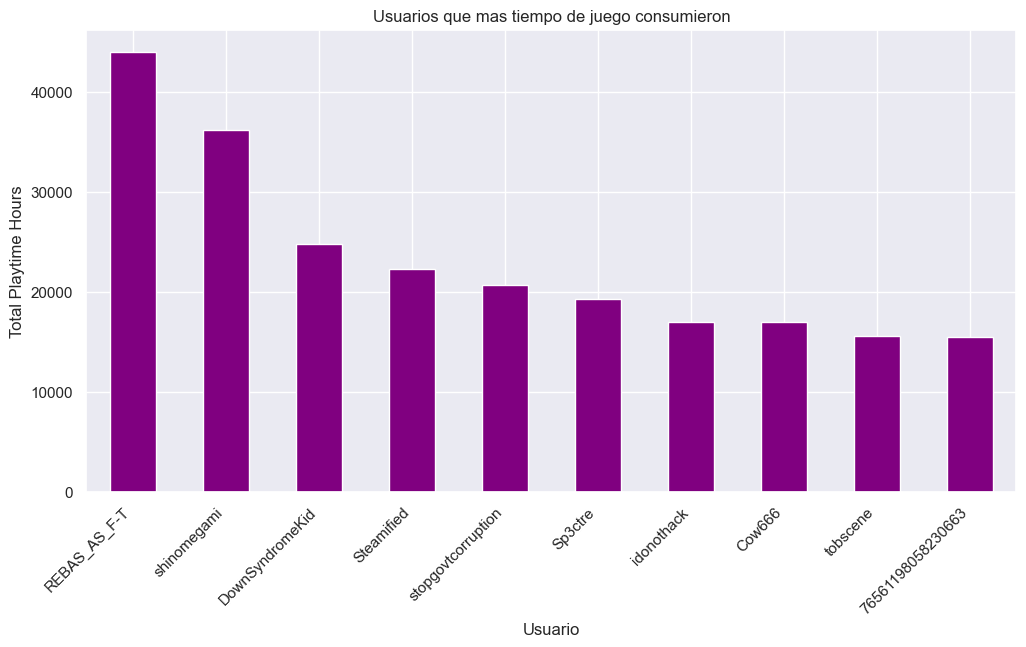

In [85]:

total_playtime_by_user = df_items.groupby("user_id")["playtime_hours"].sum().sort_values(ascending=False)
top_users = total_playtime_by_user.head(10)

plt.figure(figsize=(12, 6))
top_users.plot(kind="bar", color="purple")
plt.title("Usuarios que mas tiempo de juego consumieron")
plt.xlabel("Usuario")
plt.ylabel("Total Playtime Hours")
plt.xticks(rotation=45, ha="right")
plt.show()


### "user_id" que mas juegos consumieron

In [86]:
df_ordenado_x_itemcount = df_items.sort_values(by="items_count", ascending=False)

usuario_mayor_item_count = df_ordenado_x_itemcount.iloc[0]["user_id"]
mayor_item_count = df_ordenado_x_itemcount.iloc[0]["items_count"]

print(f'Usuario con el mayor item_count: {usuario_mayor_item_count}')
print(f'Mayor item_count: {mayor_item_count}')


Usuario con el mayor item_count: phrostb
Mayor item_count: 7762


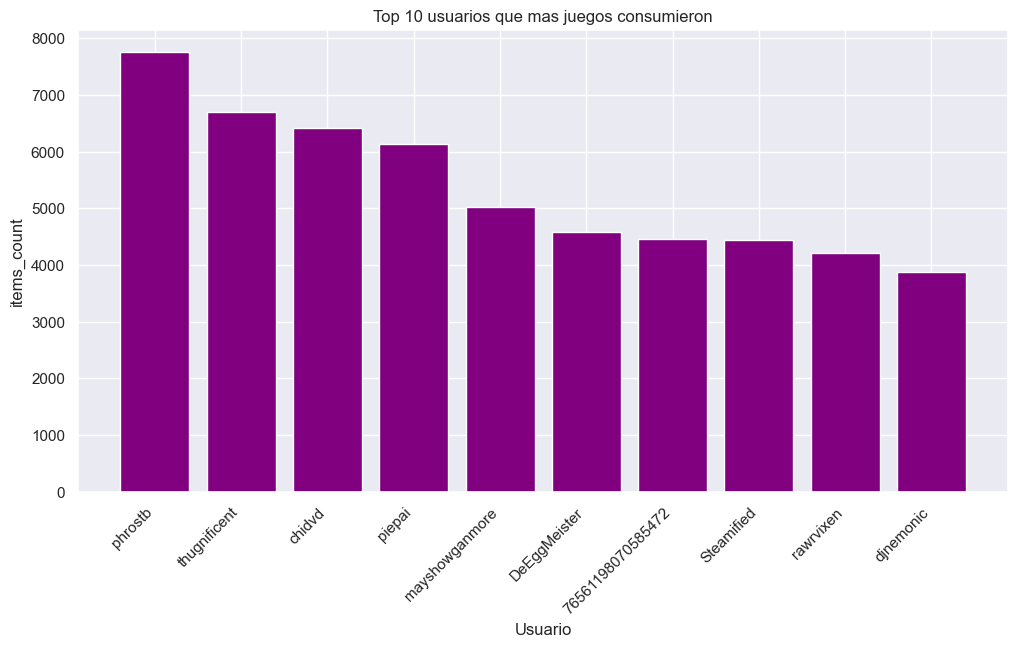

In [87]:
items_count_user = df_items.groupby("user_id")["items_count"].max().sort_values(ascending=False)
top_users = items_count_user.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_users.index, top_users.values, color="purple")
plt.title("Top 10 usuarios que mas juegos consumieron")
plt.xlabel("Usuario")
plt.ylabel("items_count")
plt.xticks(rotation=45, ha="right")
plt.show()

# EDA Reviews

Revisamos la estructura, tipo de datos y valores nulos del dataset

In [88]:
df_reviews.shape

(57538, 5)

In [89]:
df_reviews.columns

Index(['user_id', 'item_id', 'recommend', 'year_posted', 'sentiment_analysis'], dtype='object')

In [90]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57538 entries, 0 to 57537
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             57538 non-null  object
 1   item_id             57538 non-null  int64 
 2   recommend           57538 non-null  bool  
 3   year_posted         57538 non-null  int64 
 4   sentiment_analysis  57538 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.8+ MB


In [91]:
df_reviews.describe()

,item_id,year_posted,sentiment_analysis
count,57538.000,57538.000,57538.000
mean,169504.798,2013.952,1.292
std,132008.964,0.881,0.693
min,10.000,2010.000,0.000
25%,8930.000,2013.000,1.000
50%,218230.000,2014.000,1.000
75%,261640.000,2015.000,2.000
max,527340.000,2015.000,2.000


### Conclusiones preliminares:
1. user_id:
   * La columna es identificadora de usuario.
   * No parece haber datos faltantes en esta columna, ya que cuenta con 57.538, que es el número total de entradas.
2. item_id: 
   * La columna item_id representa identificadores de ítems.
3. recommend:
   * La columna recommend es una variable booleana (True/False) indicando si se recomienda o no.
4. year_posted:
   * La columna year_posted representa el año en que se publicó la review.
   * El rango de años parece estar entre 2010 y 2015.
   * La mayoría de las publicaciones parecen estar concentradas entre 2013 y 2015, según los percentiles.
5. sentiment_analysis:
   * La columna sentiment_analysis representa el resultado del análisis de sentimiento.
   * Es una variable categórica con valores 0, 1 y 2.
   * La mayoría de las opiniones tienden a ser positivas, ya que la media es 1.292 y el 75% de las opiniones tienen un puntaje de 2.

### Variable "user_id"

Esta variable representa la identificacion unica para cada usuario. Procederemos a analizar la cantidad de veces que un usuario hace una reseña

In [92]:
df_reviews["user_id"].value_counts()

user_id
NocturnalPotato      10
76561198061759775    10
TheWatchdogEM        10
teejamon             10
yoshi278             10
                     ..
76561198047306749     1
Varck                 1
76561198106998900     1
Smithy199             1
JDMBRAH               1
Name: count, Length: 25138, dtype: int64

Podemos identificar que el maximo de comentarios realizados por un usuario es de 10 y el minimo es tan solo un comentario

### Variable "year_posted"
Esta variable nos indica el año en el que se hizo la review

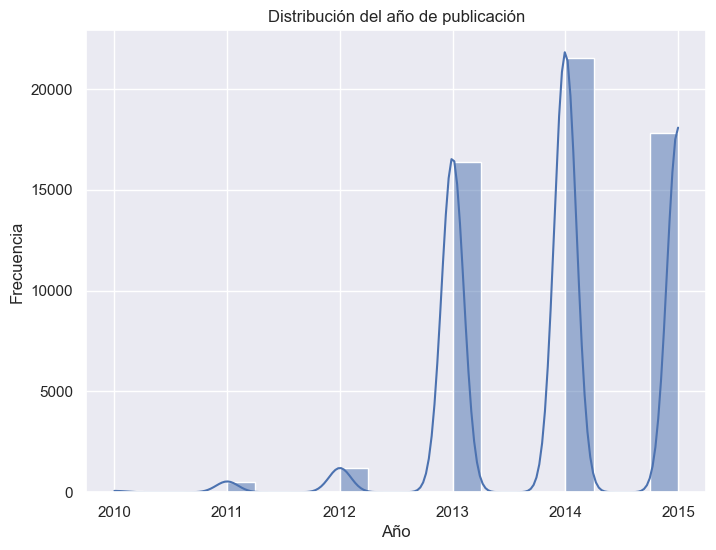

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(df_reviews['year_posted'], bins=20, kde=True)
plt.title('Distribución del año de publicación')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

In [94]:
df_reviews["year_posted"].value_counts()

year_posted
2014    21548
2015    17832
2013    16377
2012     1187
2011      528
2010       66
Name: count, dtype: int64

Podemos definir a partir de las visualizaciones que el año donde se realizaron mayor cantidad de reviews fue el 2014

### Variable "item_id"
Esta variable es el identificador unico de cada juego

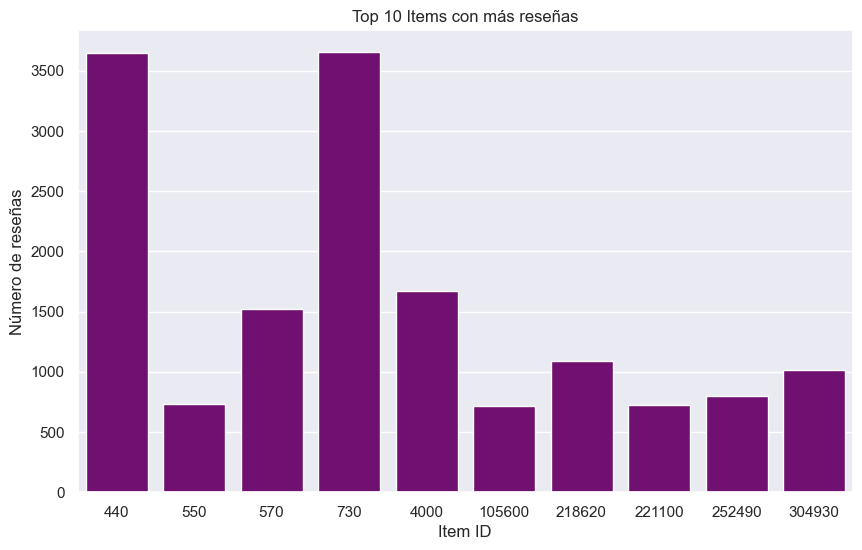

In [95]:
top_items = df_reviews["item_id"].value_counts()
top_10_items = top_items.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.index, y=top_10_items.values, color="purple")
plt.title("Top 10 Items con más reseñas")
plt.xlabel("Item ID")
plt.ylabel("Número de reseñas")
plt.show()

In [96]:
top_10_items

item_id
730       3654
440       3649
4000      1673
570       1524
218620    1089
304930    1013
252490     797
550        732
221100     721
105600     718
Name: count, dtype: int64

Podemos visualizar que los items_id que mas reseñas recibieron fueron: 730, 440, 4000, 570 y 218620

### Variable "sentiment_analysis"
Esta variable representa como fueron las reviews de los usuarios de los juegos es decir: 0 es negativa, 1 es neutral y 2 es positiva

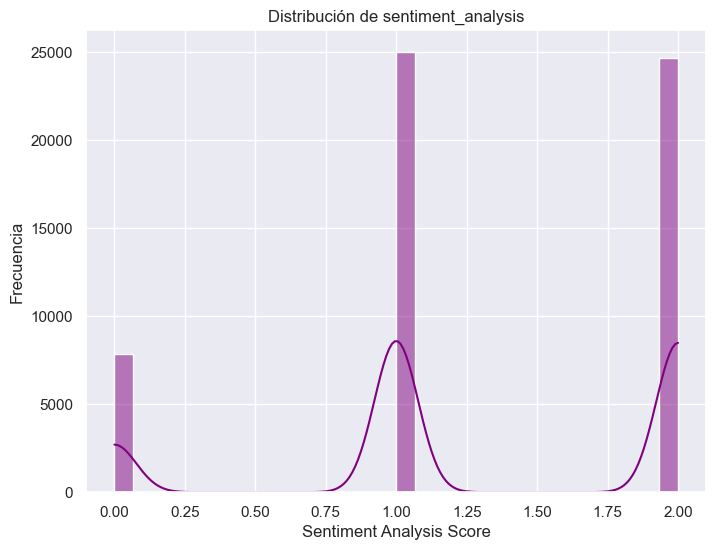

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(df_reviews["sentiment_analysis"], bins=30, kde=True, color="purple")
plt.title("Distribución de sentiment_analysis")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Frecuencia")
plt.show()

Podemos visualizar que por muy poca diferencia gran cantidad de reseñas son neutras, seguidas por las reviews positivas

### Analisis de correlaciones

### Relacion entre los principales usuarios y los principales items que consumieron

In [98]:
user_items = df_reviews.pivot_table(index="user_id",columns="item_id", values="recommend", aggfunc="count", fill_value=0)
item_mas_consumido_x_usuario = user_items.idxmax(axis=1)
conteo_review_x_usuario = user_items.max(axis=1)
user_most_reviewed_item = pd.DataFrame({'Item con mas reviews': item_mas_consumido_x_usuario, 'Conteo de reviews': conteo_review_x_usuario})
user_most_reviewed_item

,Item con mas reviews,Conteo de reviews
user_id,,
--000--,1250,1
--ace--,440,1
--ionex--,730,1
-2SV-vuLB-Kg,440,1
-Azsael-,226860,1
...,...,...
zwanzigdrei,440,1
zy0705,440,1
zynxgameth,204300,1


### Relacion entre los principales usuarios y los años en los que hicieron reviews

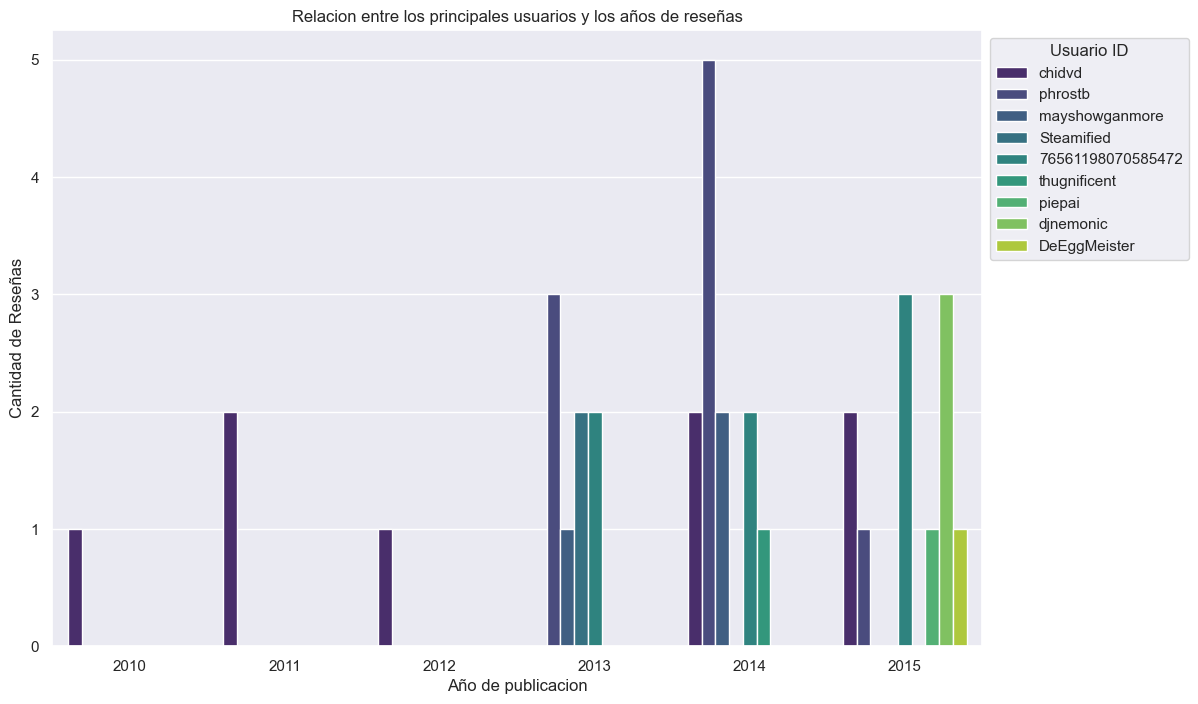

In [99]:
top_users_reviews = df_reviews[df_reviews["user_id"].isin(top_users.index)]
plt.figure(figsize=(12,8))
sns.countplot(x="year_posted", hue="user_id", data=top_users_reviews, palette="viridis")
plt.title("Relacion entre los principales usuarios y los años de reseñas")
plt.ylabel("Cantidad de Reseñas")
plt.xlabel("Año de publicacion")
plt.legend(title="Usuario ID", bbox_to_anchor=(1,1), loc="upper left")
plt.show()

### Relación entre Usuario y Recomendación

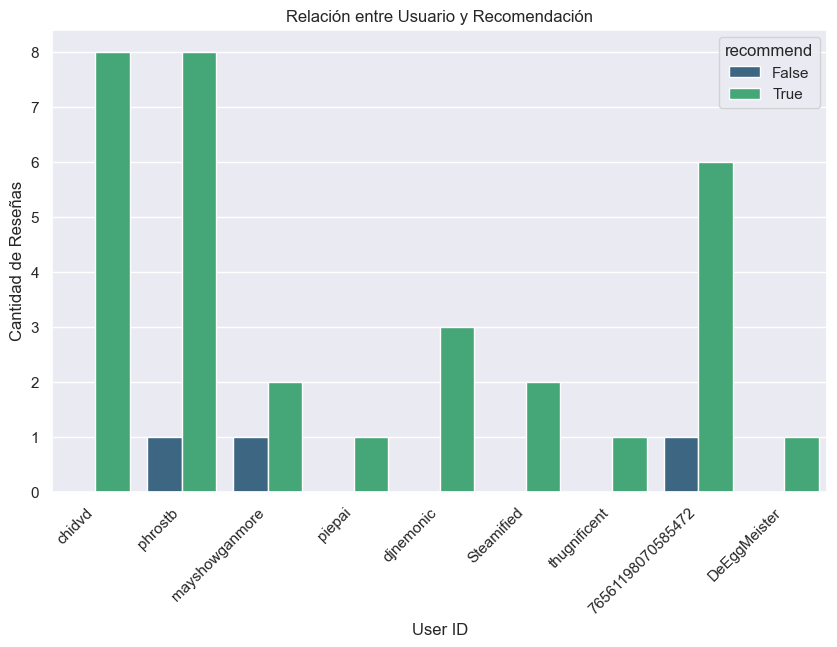

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x="user_id", hue="recommend", data=df_reviews[df_reviews["user_id"].isin(top_users.index)], palette="viridis")
plt.title("Relación entre Usuario y Recomendación")
plt.xlabel("User ID")
plt.ylabel("Cantidad de Reseñas")
plt.xticks(rotation=45, ha="right")
plt.show()

Aqui podemos visualizar los principales usuarios que hicieron reviews y en cuales de estas recomendaban el juego o no

### Relación entre Recomendación y Análisis de Sentimientos

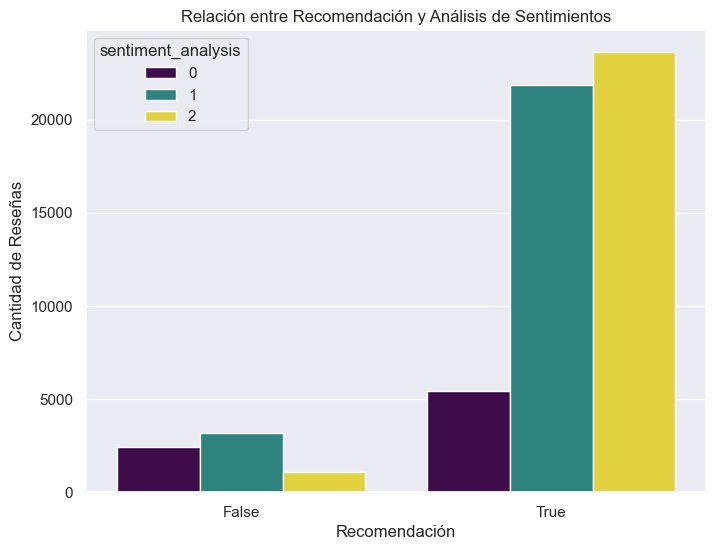

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(x="recommend", hue="sentiment_analysis", data=df_reviews, palette="viridis")
plt.title("Relación entre Recomendación y Análisis de Sentimientos")
plt.xlabel("Recomendación")
plt.ylabel("Cantidad de Reseñas")
plt.show()

Aqui visualizamos la relacion entre el analisis de sentimiento que se realizo sobre la reseña con la decision del usuario de recomendarla o no